# GMM and EM
Gaussian Mixture Models and Expectation Maximization.

Based on my data mining notebook DM573/EM.

In [1]:
import numpy as np
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture

In [2]:
try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/'  # must end in "/"
except:
    IN_COLAB = False
    DATA_DIR = 'D:/Adjeroh/Localization/TrainTest/'   # Windows
    DATA_DIR = '/Users/jasonmiller/WVU/Localization/TrainTest/'    # Mac
print(DATA_DIR)

/Users/jasonmiller/WVU/Localization/TrainTest/


In [3]:
GENES_FILE =    'CNRCI_noncoding_train_genes.csv'
RCI_FILE =      'CNRCI_noncoding_train_RCI.gc42.csv'

In [4]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080','HUVEC','MCF.7','NCI.H460','NHEK',\
     'SK.MEL.5','SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()

CELL_LINE = 0
print('Cell line for today',CELL_LINE,all_cell_lines[CELL_LINE])
EXCLUSIONS = [1,7]
for c in EXCLUSIONS:
    print('Exclude cell line',c,all_cell_lines[c])

Cell line for today 0 A549
Exclude cell line 1 H1.hESC
Exclude cell line 7 NCI.H460


In [5]:
class RCI_Loader():
    def __init__(self):
        self.cache=dict() 
        
    def load_gene_rci_values(self,filepath,cell_line):
        '''
        Load from RCI csv file.
        Return dict with keys=gene:str and values=RCI:float.
        '''
        gene_to_rci = {}
        overall_sum = 0
        with open (filepath,'r') as handle:
            header = None
            for row in handle:
                if header is None:
                    header = row # skip file's header line
                else:
                    line = row.strip()
                    fields = line.split(',')
                    gene_id = fields.pop(0)
                    rci_str = fields[cell_line]
                    if rci_str != "nan":
                        rci_val = float(rci_str)
                        gene_to_rci[gene_id] = rci_val
        return gene_to_rci

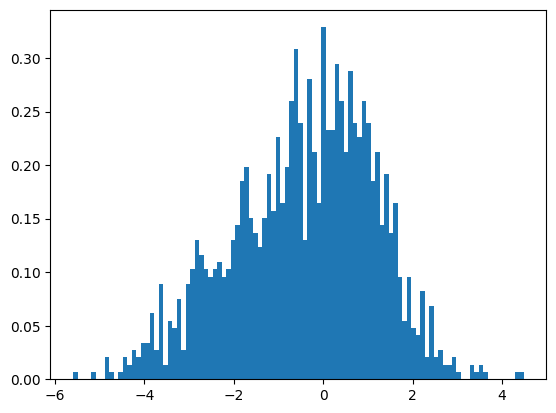

Cell Line 0 A549
Number of RCI values 1447
max/min RCI 4.49338 -5.59991
GaussianMixture(covariance_type='spherical')
AIC 5455.245489783776 BIC 5465.799985237039 score -1.8836370040717954
Gaussian 0 mean= [-0.43521711] wgt= 1.0 cov= 2.532982181690059


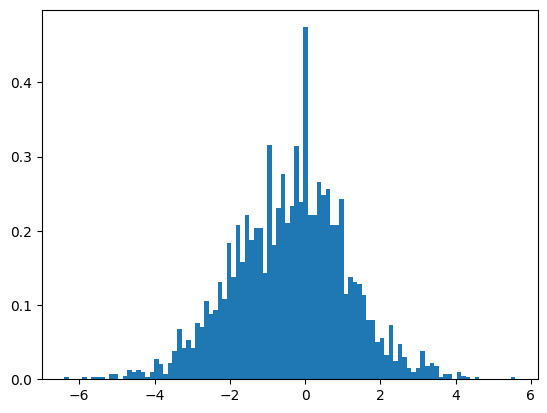

Cell Line 1 H1.hESC
Number of RCI values 3327
max/min RCI 5.58139 -6.39803
GaussianMixture(covariance_type='spherical')
AIC 12222.65845590819 BIC 12234.878108460227 score -1.8362877150448136
Gaussian 0 mean= [-0.39739329] wgt= 1.0 cov= 2.304119937500234


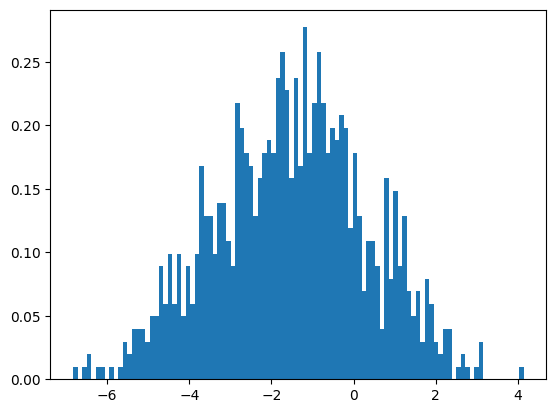

Cell Line 2 HeLa.S3
Number of RCI values 919
max/min RCI 4.14975 -6.83394
GaussianMixture(covariance_type='spherical')
AIC 3743.8015907714002 BIC 3753.4481630161117 score -2.03471250858074
Gaussian 0 mean= [-1.51291487] wgt= 1.0 cov= 3.4265305321314274


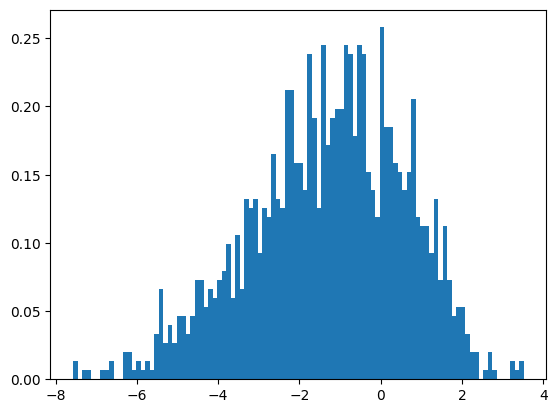

Cell Line 3 HepG2
Number of RCI values 1362
max/min RCI 3.52356 -7.57193
GaussianMixture(covariance_type='spherical')
AIC 5624.991226766171 BIC 5635.42464573959 score -2.063506324069813
Gaussian 0 mean= [-1.30047092] wgt= 1.0 cov= 3.629648665536366


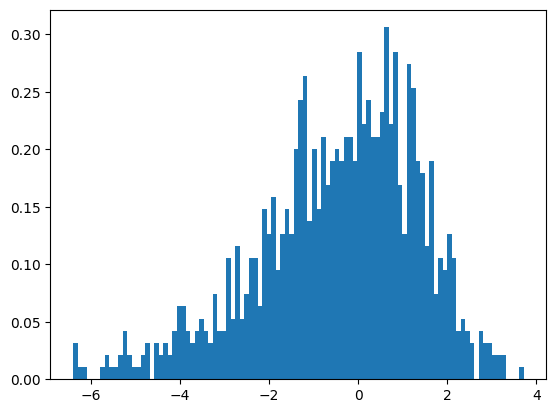

Cell Line 4 HT1080
Number of RCI values 936
max/min RCI 3.72012 -6.39803
GaussianMixture(covariance_type='spherical')
AIC 3767.295591108158 BIC 3776.978822061113 score -2.010307473882563
Gaussian 0 mean= [-0.46008133] wgt= 1.0 cov= 3.2632975018688977


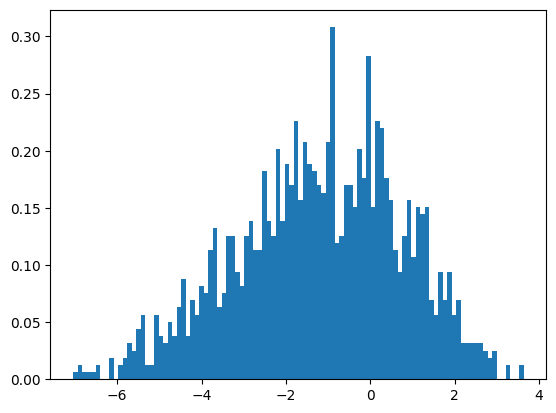

Cell Line 5 HUVEC
Number of RCI values 1488
max/min RCI 3.64386 -7.04803
GaussianMixture(covariance_type='spherical')
AIC 6242.983688957855 BIC 6253.594065388641 score -2.0964326911820748
Gaussian 0 mean= [-1.20761606] wgt= 1.0 cov= 3.87671666064744


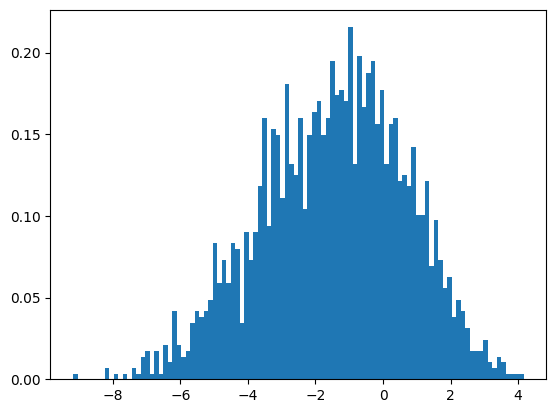

Cell Line 6 MCF.7
Number of RCI values 2156
max/min RCI 4.16993 -9.1779
GaussianMixture(covariance_type='spherical')
AIC 9429.203288235556 BIC 9440.555308099614 score -2.1858078126705833
Gaussian 0 mean= [-1.4670061] wgt= 1.0 cov= 4.635475462483851


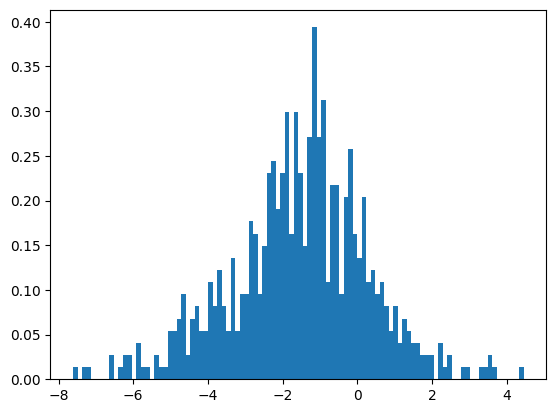

Cell Line 7 NCI.H460
Number of RCI values 610
max/min RCI 4.45943 -7.61176
GaussianMixture(covariance_type='spherical')
AIC 2475.302350249103 BIC 2484.1292681634377 score -2.025657664138609
Gaussian 0 mean= [-1.54018314] wgt= 1.0 cov= 3.365035655543331


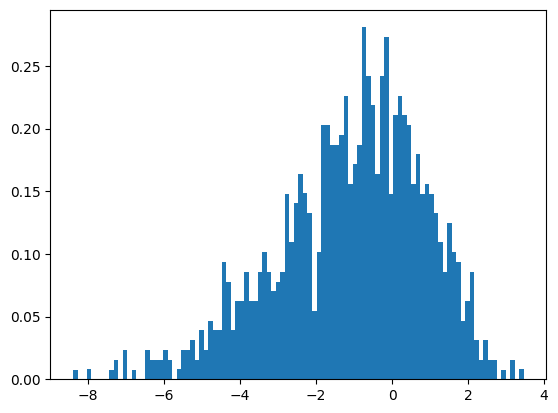

Cell Line 8 NHEK
Number of RCI values 1080
max/min RCI 3.46877 -8.40027
GaussianMixture(covariance_type='spherical')
AIC 4514.108226758826 BIC 4524.077659399063 score -2.088013067943901
Gaussian 0 mean= [-1.09901546] wgt= 1.0 cov= 3.811982259058879


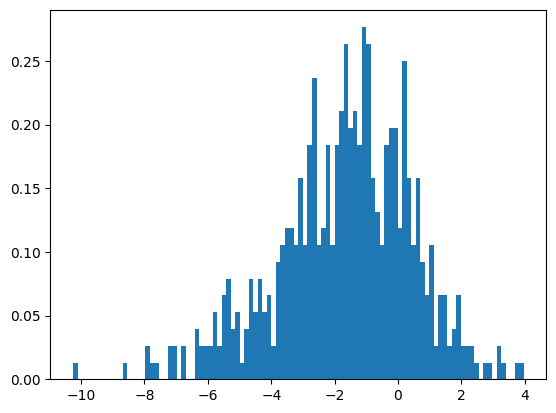

Cell Line 9 SK.MEL.5
Number of RCI values 534
max/min RCI 3.97389 -10.255
GaussianMixture(covariance_type='spherical')
AIC 2332.7751361684614 BIC 2341.3359278463818 score -2.1805010638281472
Gaussian 0 mean= [-1.68603146] wgt= 1.0 cov= 4.586537028380253


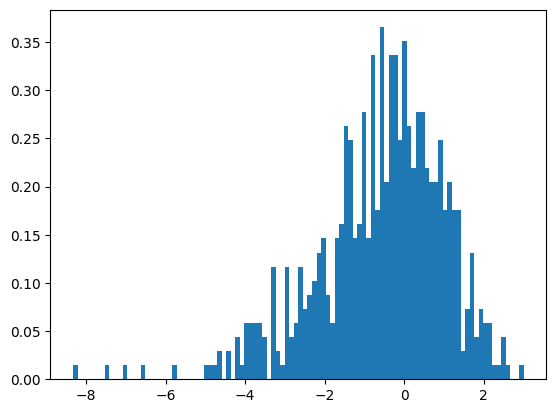

Cell Line 10 SK.N.DZ
Number of RCI values 603
max/min RCI 3.01597 -8.33023
GaussianMixture(covariance_type='spherical')
AIC 2277.460521247609 BIC 2286.2643556410635 score -1.8851248103214004
Gaussian 0 mean= [-0.57847749] wgt= 1.0 cov= 2.5405305771348514


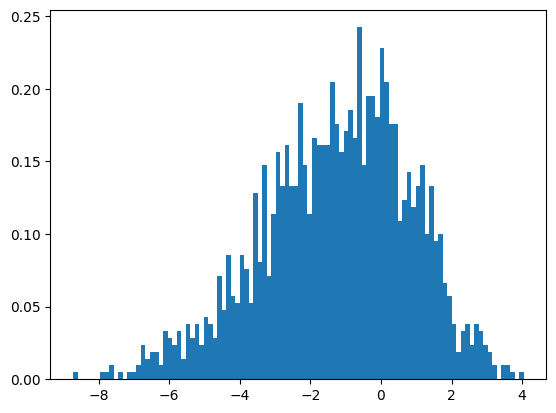

Cell Line 11 SK.N.SH
Number of RCI values 1647
max/min RCI 4.05156 -8.72752
GaussianMixture(covariance_type='spherical')
AIC 7122.564132351813 BIC 7133.377553812168 score -2.161069864101947
Gaussian 0 mean= [-1.25692489] wgt= 1.0 cov= 4.4117122899458465


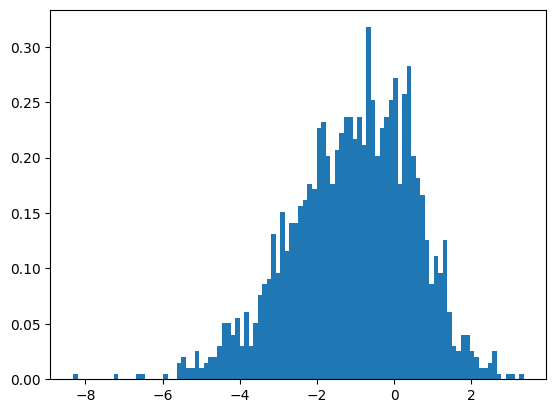

Cell Line 12 GM12878
Number of RCI values 1698
max/min RCI 3.36075 -8.32125
GaussianMixture(covariance_type='spherical')
AIC 6387.499161968057 BIC 6398.373574701799 score -1.8797111784358236
Gaussian 0 mean= [-1.06966594] wgt= 1.0 cov= 2.5131719699822703


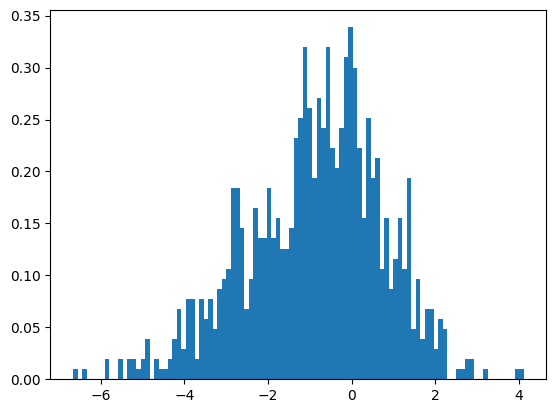

Cell Line 13 K562
Number of RCI values 958
max/min RCI 4.11894 -6.66607
GaussianMixture(covariance_type='spherical')
AIC 3666.972824623317 BIC 3676.702520179259 score -1.911781223707368
Gaussian 0 mean= [-0.88045596] wgt= 1.0 cov= 2.679648834913383


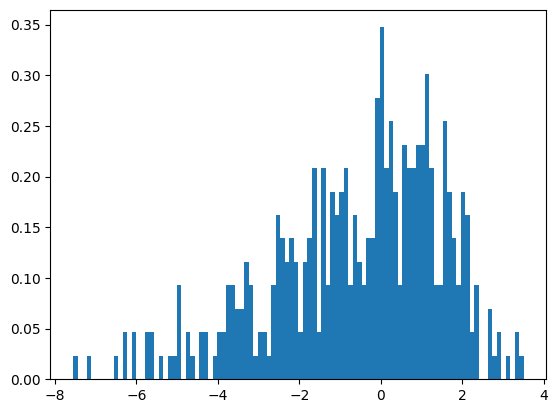

Cell Line 14 IMR.90
Number of RCI values 390
max/min RCI 3.51549 -7.55636
GaussianMixture(covariance_type='spherical')
AIC 1685.2162623623524 BIC 1693.1485558405998 score -2.1554054645671186
Gaussian 0 mean= [-0.58515997] wgt= 1.0 cov= 4.362014936374219


In [8]:
filename = DATA_DIR + RCI_FILE
loader = RCI_Loader()

def plot(X,cell_line,num_bins):
    pyplot.hist(X, bins=num_bins, density=True)
    pyplot.show()
    print('Cell Line',cell_line,all_cell_lines[cell_line])
    print('Number of RCI values',len(gene_to_rci.keys()))
    print('max/min RCI', max(X), min(X))

def show_gmm(model,X):
    print(model)
    print('AIC',model.aic(X),'BIC',model.bic(X),'score',model.score(X))
    for i in range(model.n_components):
        print('Gaussian',i,'mean=',model.means_[i],
            'wgt=',model.weights_[i], 'cov=',model.covariances_[i])

for cell_line in range(15):
    gene_to_rci = loader.load_gene_rci_values(filename,cell_line)
    values = list(gene_to_rci.values())
    plot(values,cell_line,100)
    values = np.array(values)
    values = values.reshape(-1, 1)
    model = GaussianMixture(n_components=1, verbose=0, covariance_type='spherical') # default='full'
    model.fit(values)
    show_gmm(model,values)